In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
plt.style.use('csdh.mplstyle')

## Plotting Code

In [2]:
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [3]:
DATA_FILENAME = "csdh.csv"
DATA_FILEPATH = "/Users/callum/Uni/GitHubRepos/surviving-the-icu/datasets/drain_data/" + DATA_FILENAME

In [4]:
csdh = pd.read_csv(DATA_FILEPATH).iloc[:,1:] # drop first index column

In [12]:
csdh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 763 non-null    int64  
 1   sex                 763 non-null    int64  
 2   hospital            763 non-null    int64  
 3   diabetes            763 non-null    int64  
 4   dementia            763 non-null    int64  
 5   copd                763 non-null    int64  
 6   stroke              763 non-null    int64  
 7   ihd                 763 non-null    int64  
 8   arrhythmia          763 non-null    int64  
 9   epilepsy            763 non-null    int64  
 10  shunt               763 non-null    int64  
 11  malignancy          763 non-null    int64  
 12  metalvalve          763 non-null    int64  
 13  headinjury          763 non-null    int64  
 14  residence           763 non-null    int64  
 15  mobility            763 non-null    int64  
 16  adm_mrs 

In [13]:
# Summary stats
csdh.describe()

,age,sex,hospital,diabetes,dementia,copd,stroke,ihd,arrhythmia,epilepsy,...,optype,surgeon,anaesthetic,csdhcolour,drain,drain_end,drain_entry,drain_days,timetoop_corrected,recurrence
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,762.000000,763.000000,637.000000,535.000000,637.000000,762.000000,745.000000
mean,74.255570,0.677588,11.218873,0.161206,0.110092,0.055046,0.163827,0.247706,0.207077,0.041940,...,1.125819,2.812582,1.072084,2.069554,0.834862,1.084772,1.652336,1.784929,3.811024,0.092617
std,14.017104,0.467706,7.960075,0.367962,0.313209,0.228219,0.370361,0.431964,0.405477,0.200583,...,0.383247,0.458514,0.258796,1.380031,0.371548,0.278762,0.476674,0.525356,9.505430,0.290090
min,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,67.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,77.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
75%,84.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,0.000000
max,99.000000,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,2.000000,5.000000,180.000000,1.000000


In [6]:
csdh.tail()

,age,sex,hospital,diabetes,dementia,copd,stroke,ihd,arrhythmia,epilepsy,...,burrhole_num,surgeon,anaesthetic,csdhcolour,drain,drain_end,drain_entry,drain_days,timetoop_corrected,recurrence
758,96,0,18,0,0,0,0,0,0,0,...,2,2,1,1.0,1,2.0,2.0,2.0,1.0,0.0
759,96,0,3,0,1,0,0,0,0,0,...,1,2,2,3.0,1,1.0,NaN,1.0,5.0,0.0
760,97,1,4,0,0,0,0,0,0,0,...,2,3,2,1.0,1,1.0,NaN,1.0,1.0,0.0
761,98,1,18,0,0,0,0,0,0,0,...,2,2,1,1.0,1,1.0,2.0,2.0,3.0,0.0
762,99,1,6,0,0,0,0,0,0,0,...,2,3,1,1.0,1,1.0,1.0,2.0,2.0,0.0


In [7]:
csdh.keys()

Index(['age', 'sex', 'hospital', 'diabetes', 'dementia', 'copd', 'stroke',
       'ihd', 'arrhythmia', 'epilepsy', 'shunt', 'malignancy', 'metalvalve',
       'headinjury', 'residence', 'mobility', 'adm_mrs', 'adm_cogimpair',
       'adm_seizure', 'adm_incontinence', 'adm_gait', 'adm_dysphasia',
       'adm_hemiparesis', 'adm_headache', 'adm_facialdroop', 'gcs_e', 'gcs_v',
       'gcs_m', 'gcs_preop', 'platelet', 'inr', 'antithrombotics', 'warfarin',
       'antiplatelet', 'laterality', 'thickness_r', 'thickness_l',
       'thickness_cleaned', 'midlineshift', 'density', 'membranes', 'steroid',
       'optype', 'burrhole_num', 'surgeon', 'anaesthetic', 'csdhcolour',
       'drain', 'drain_end', 'drain_entry', 'drain_days', 'timetoop_corrected',
       'recurrence'],
      dtype='object')

In [8]:
reduced_cols = ['age', 'sex', 'hospital', 'surgeon', 'drain', 'optype']

In [9]:
viz_df = csdh.copy()[reduced_cols]

In [10]:
viz_df.tail(10)

,age,sex,hospital,surgeon,drain,optype
753,94,0,11,3,1,1
754,94,0,24,3,1,1
755,95,1,5,3,1,1
756,95,1,4,3,1,1
757,95,0,19,3,1,1
758,96,0,18,2,1,1
759,96,0,3,2,1,1
760,97,1,4,3,1,1
761,98,1,18,2,1,1
762,99,1,6,3,1,1


---
# DataViz Begins...

## Distributional Summary

In [11]:
print(f"The median patient age is {viz_df.age.median()}")

The median patient age is 77.0


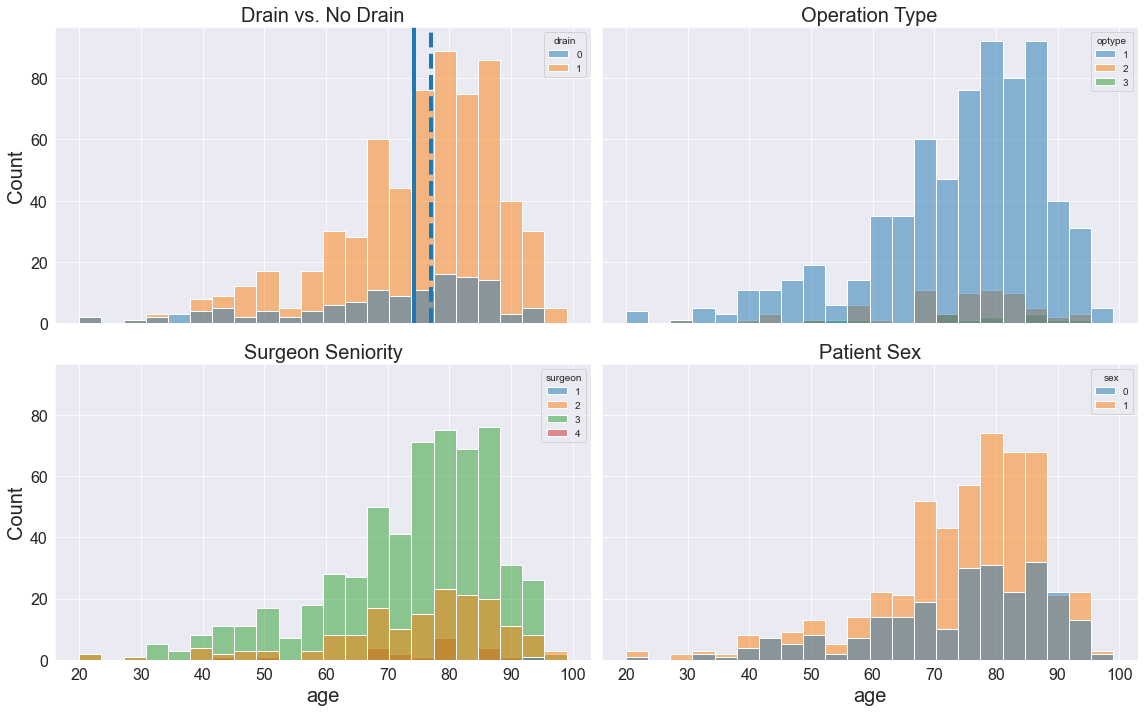

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)

# ax1
sns.histplot(data = viz_df, x='age', hue='drain', ax=ax1, palette='tab10')
ax1.axvline(viz_df.age.mean(), lw=4, label='mean')
ax1.axvline(viz_df.age.median(), ls='--', lw=4, label='median')
ax1.set_title('Drain vs. No Drain')

# ax2
sns.histplot(data = viz_df, x='age', hue='optype', palette='tab10', ax=ax2)
ax2.set_title('Operation Type')

# ax3
sns.histplot(data = viz_df, x='age', hue='surgeon', palette='tab10', ax=ax3)
ax3.set_title('Surgeon Seniority')

# ax4
sns.histplot(data = viz_df, x='age', hue='sex', palette='tab10', ax=ax4)
ax4.set_title('Patient Sex')

plt.tight_layout()
plt.show()

## Categorical Summary

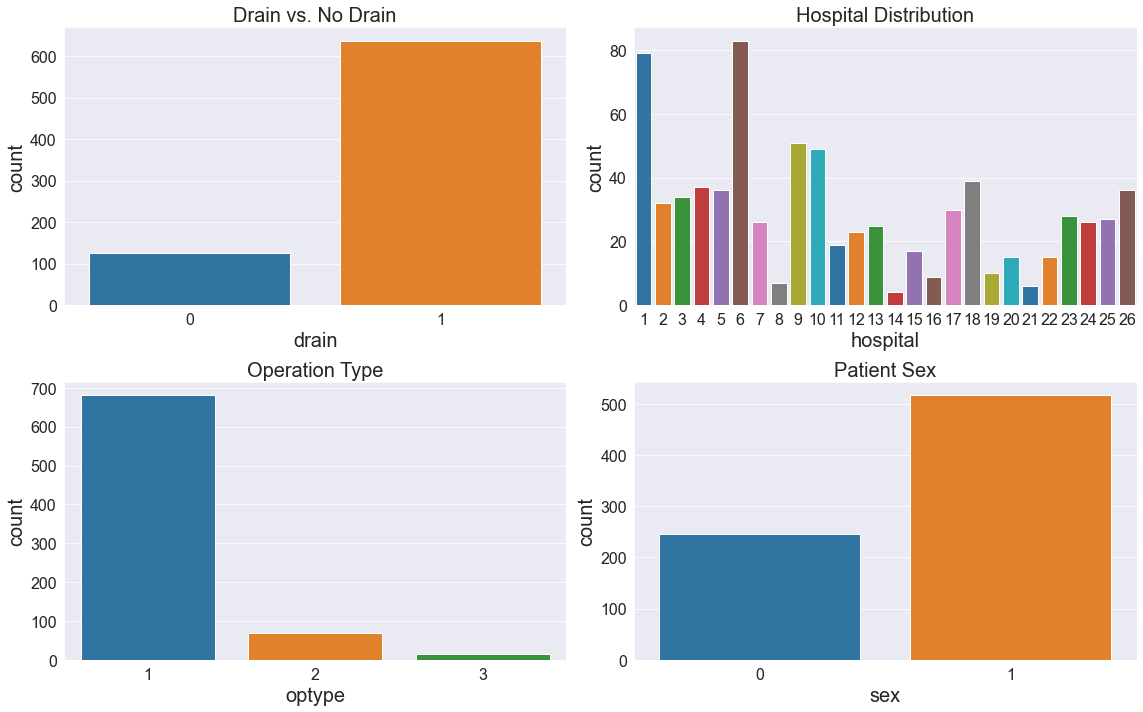

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# ax1
sns.countplot(data=viz_df, x='drain', palette='tab10', ax=ax1)
ax1.set_title('Drain vs. No Drain')

# ax2
sns.countplot(data=viz_df, x='hospital',palette='tab10', ax=ax2)
ax2.set_title('Hospital Distribution')

# ax3
sns.countplot(data=viz_df, x='optype', palette='tab10', ax=ax3)
ax3.set_title('Operation Type')

# ax4
sns.countplot(data = viz_df, x='sex', palette='tab10', ax=ax4)
ax4.set_title('Patient Sex')

plt.tight_layout()
plt.show()

# Missing Data

In [14]:
md_df = csdh.groupby('drain')
md_df = md_df.apply(lambda x: x.isna().sum())

In [15]:
md_df = md_df.loc[:, (md_df != 0).any(axis=0)].transpose()

In [16]:
md_df.loc[:,'total'] = md_df.sum(axis=1)

In [17]:
md_df = md_df.reset_index().rename(columns={'index':'covariate', 0:'no_drain', 1:'drained'})

In [18]:
md_df = md_df.sort_values(by='total', ascending=False)

In [19]:
md_df

drain,covariate,no_drain,drained,total
0,thickness_cleaned,41,227,268
4,drain_entry,126,102,228
3,drain_end,126,0,126
5,drain_days,126,0,126
1,burrhole_num,17,37,54
7,recurrence,3,15,18
2,csdhcolour,1,0,1
6,timetoop_corrected,0,1,1


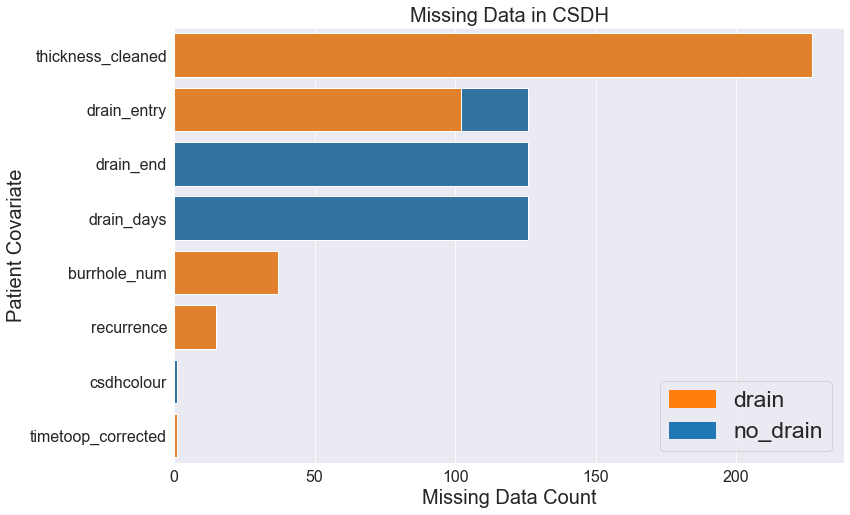

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
s1 = sns.barplot(y='covariate', x='no_drain', data=md_df, color=sns.color_palette('tab10')[0])
s2 = sns.barplot(y='covariate', x='drained', data=md_df, color=sns.color_palette('tab10')[1])
ax.set(xlabel='Missing Data Count', ylabel='Patient Covariate', title='Missing Data in CSDH')
drain_patch = mpatches.Patch(color=sns.color_palette('tab10')[1], label='drain')
no_drain_patch = mpatches.Patch(color=sns.color_palette('tab10')[0], label='no_drain')

ax.legend(handles=[drain_patch, no_drain_patch], loc='lower right', fontsize=23)
plt.show()

### `thickness_cleaned` has many missing datapoints - as expected - since this variables measures the maximal thickness of the hematoma on either side of the patient's brain if CSDH is present on both sides. We can hence safely ignore the `NaN`s for this variable then.

### We observe that the drain related variabes have a very high count of missing data but most of this originates from the `no_drain` subset. However, a substantial amount of missing data for the `drain_entry` variable even when the patient received the `drain` treatment. Why is this? How can we correct for this if this variable is important in the DAG? Note: Michael said hospital may be useful to impute drain_entry.


### Another point of concern is the missing data in perhaps the most important `recurrence` variable. Not sure how to approach this one --> maybe < 20 people can be safely dropped from the dataset. 

---

In [34]:
csdh.keys()

Index(['age', 'sex', 'hospital', 'diabetes', 'dementia', 'copd', 'stroke',
       'ihd', 'arrhythmia', 'epilepsy', 'shunt', 'malignancy', 'metalvalve',
       'headinjury', 'residence', 'mobility', 'adm_mrs', 'adm_cogimpair',
       'adm_seizure', 'adm_incontinence', 'adm_gait', 'adm_dysphasia',
       'adm_hemiparesis', 'adm_headache', 'adm_facialdroop', 'gcs_e', 'gcs_v',
       'gcs_m', 'gcs_preop', 'platelet', 'inr', 'antithrombotics', 'warfarin',
       'antiplatelet', 'laterality', 'thickness_r', 'thickness_l',
       'thickness_cleaned', 'midlineshift', 'density', 'membranes', 'steroid',
       'optype', 'burrhole_num', 'surgeon', 'anaesthetic', 'csdhcolour',
       'drain', 'drain_end', 'drain_entry', 'drain_days', 'timetoop_corrected',
       'recurrence'],
      dtype='object')

# DAG Variables

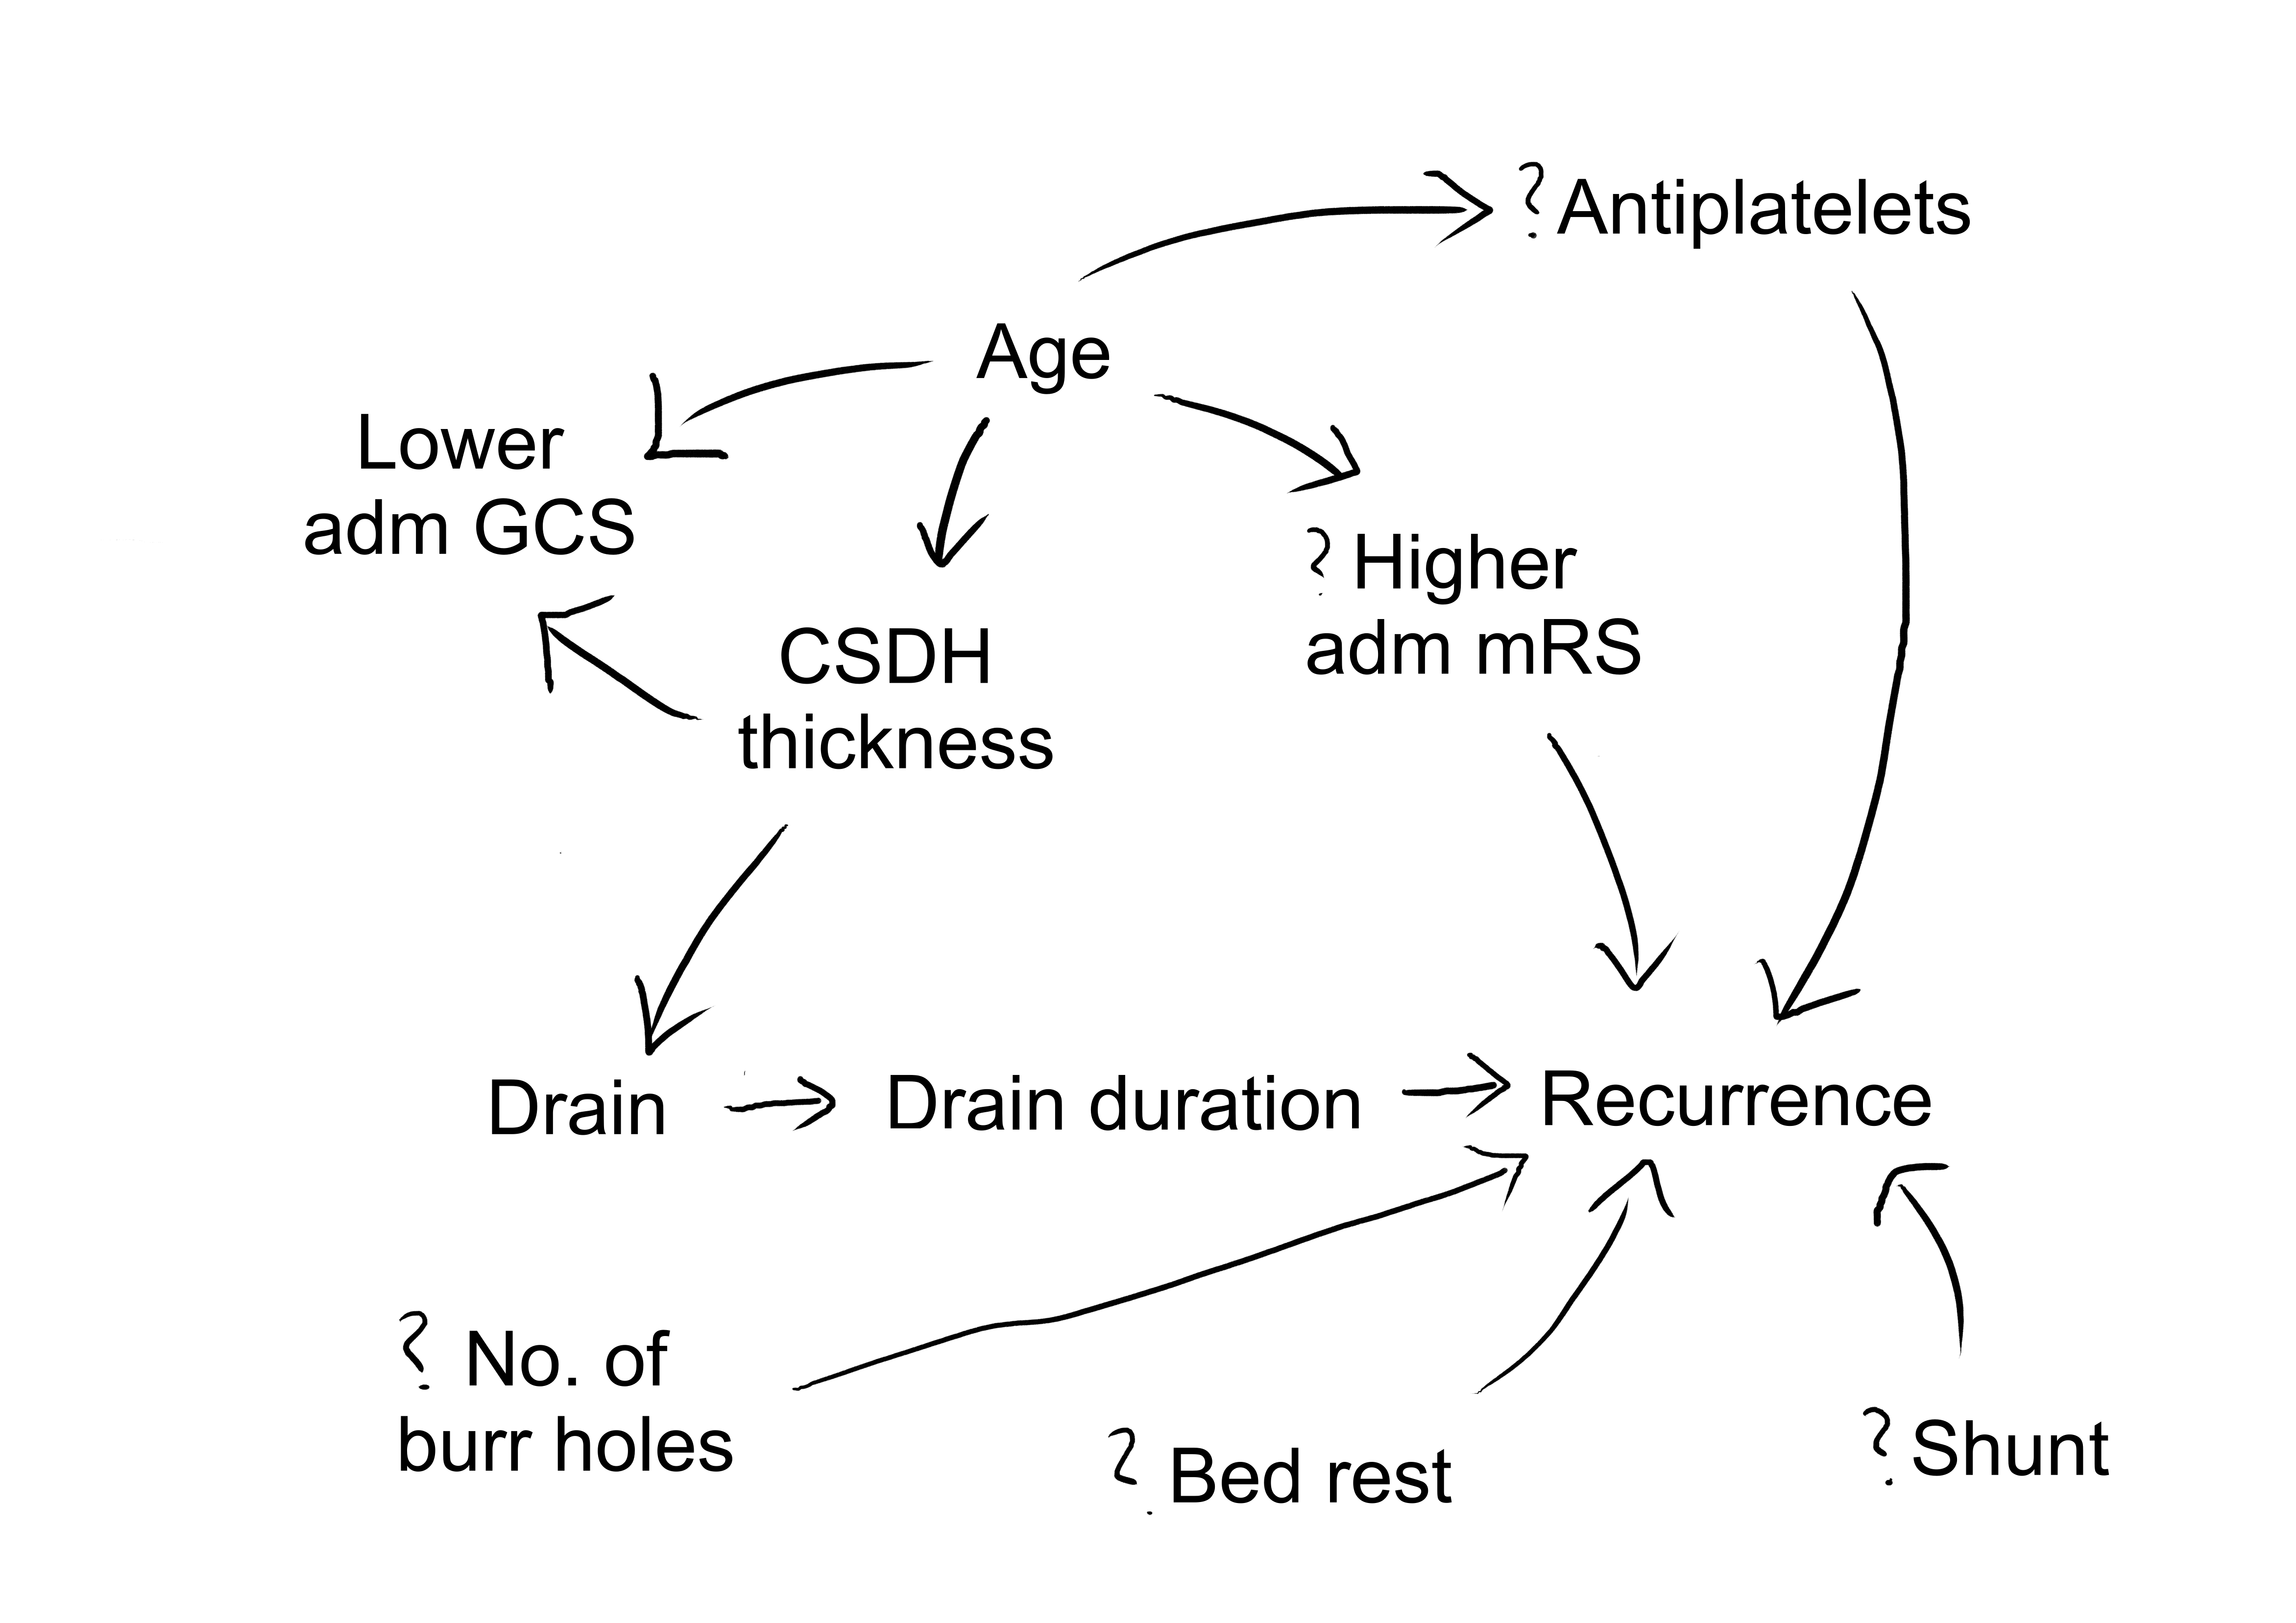

In [35]:
dag_vars = [
    'age', 'thickness_cleaned', 
    'gcs_preop', 'adm_mrs', 
    'antiplatelet', 'drain', 
    'drain_days', 'recurrence',
    'burrhole_num', 'shunt'
]

In [38]:
csdh_dag = csdh[dag_vars]
csdh_dag.head()

,age,thickness_cleaned,gcs_preop,adm_mrs,antiplatelet,drain,drain_days,recurrence,burrhole_num,shunt
0,20,NaN,15,1,0,0,NaN,1.0,1,1
1,23,6.0,14,2,0,1,2.0,0.0,2,0
2,23,13.0,15,2,0,1,2.0,0.0,2,0
3,23,8.0,15,0,0,0,NaN,0.0,2,0
4,28,10.0,15,3,0,0,NaN,0.0,2,0


In [89]:
sum(csdh_dag['recurrence'] == 1.0) / csdh_dag.shape[0] * 100

9.043250327653997

## Thickness

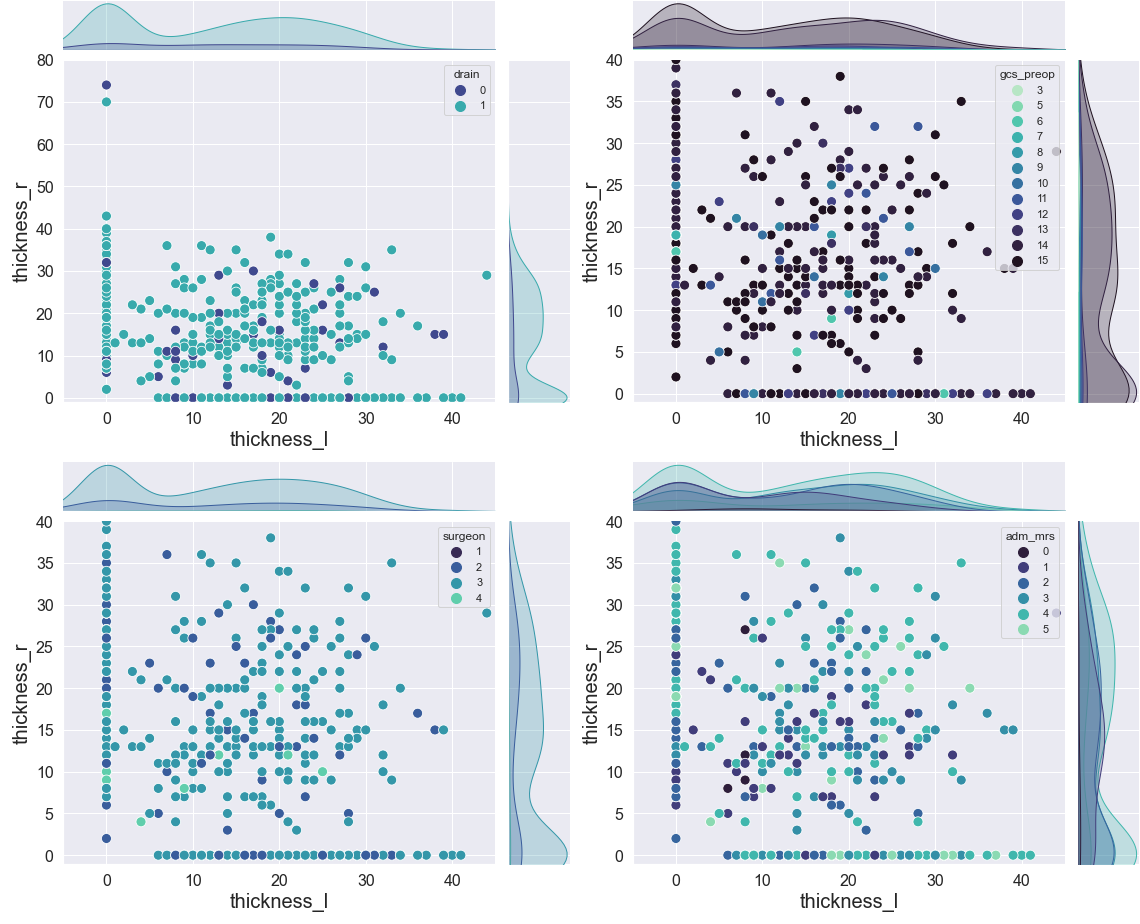

In [83]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns;

g0 = sns.jointplot(data=csdh, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="drain", 
                   xlim=(-5,45),
                   ylim=(-1, 80),
                   height=10, palette=sns.color_palette("mako", 2))


g1 = sns.jointplot(data=csdh, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="gcs_preop", 
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", 12)[::-1])

g2 =  sns.jointplot(data=csdh, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="surgeon", 
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", 4))

g3 =  sns.jointplot(data=csdh, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="adm_mrs", 
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", len(csdh['adm_mrs'].unique())))

# g3 = sns.lmplot(data=csdh_dag,
#                 x="age",
#                 y="thickness_cleaned",
#                 hue='drain',
#                 palette=sns.color_palette("mako", 2)
#                )

fig = plt.figure(figsize=(16,13))
gs = gridspec.GridSpec(2, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])

gs.tight_layout(fig)


### Let's have a look at those patients who have measurements for both `thickness_l` and `thickness_r` grouped by the `drain variable` (left and middle). No obvious pattern emerging

### What if we grouped by surgeon? Paul and Michael mentioned that senior surgeons often take over if there are complications? Maybe complications are more likely to arise if the hematoma is larger? Nope.

### We do observe, as Paul and Michael expected, patients with a larger hematoma presented a higher MRS score upon submission.

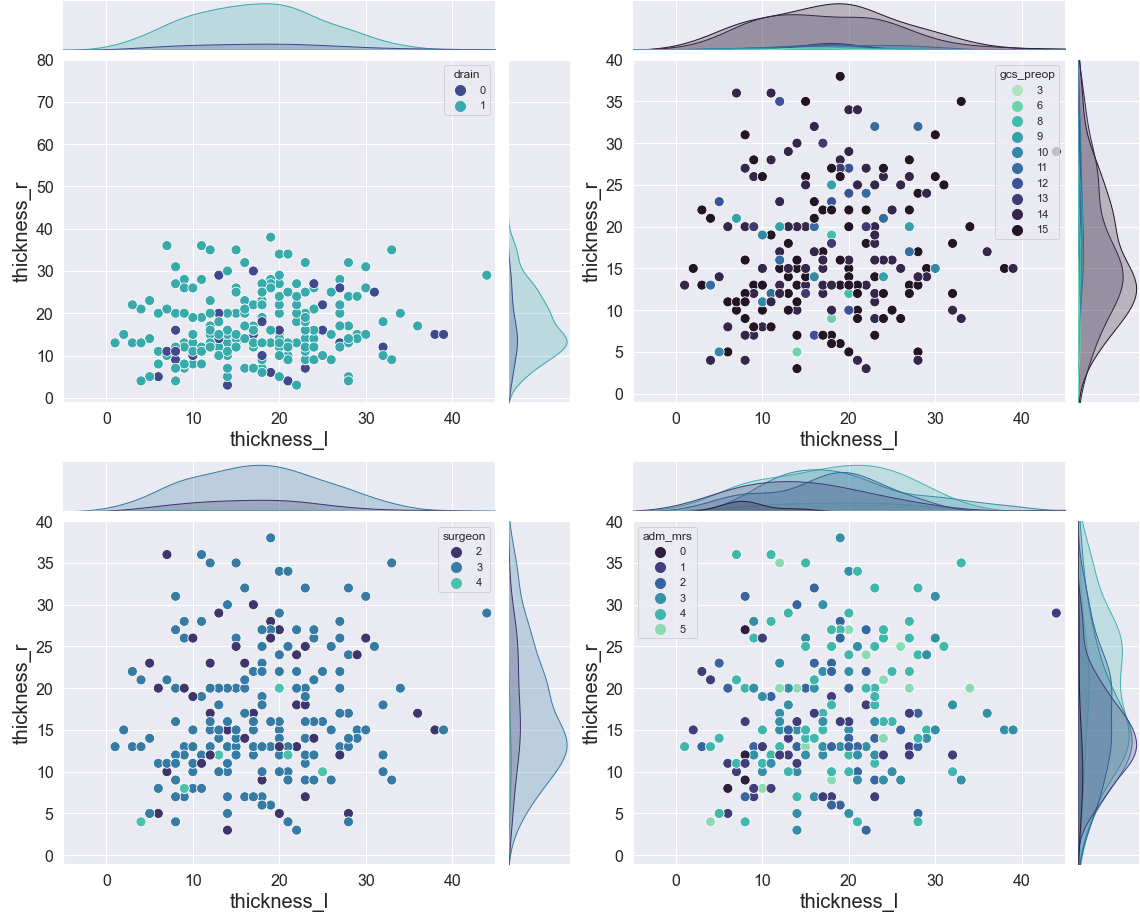

In [87]:
g0 = sns.jointplot(data=csdh_thick, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="drain", 
                   xlim=(-5,45),
                   ylim=(-1, 80),
                   height=10, palette=sns.color_palette("mako", 2))

csdh_thick = csdh[(csdh['thickness_l'] != 0) & (csdh['thickness_r'] != 0)]

g1 = sns.jointplot(data=csdh_thick, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="gcs_preop", 
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", 10)[::-1])

g2 =  sns.jointplot(data=csdh_thick, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="surgeon", 
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", 3))

g3 =  sns.jointplot(data=csdh_thick, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="adm_mrs", 
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", len(csdh['adm_mrs'].unique())))

# g3 = sns.lmplot(data=csdh_dag,
#                 x="age",
#                 y="thickness_cleaned",
#                 hue='drain',
#                 palette=sns.color_palette("mako", 2)
#                )

fig = plt.figure(figsize=(16,13))
gs = gridspec.GridSpec(2, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])

gs.tight_layout(fig)


---
